In [1]:
import pandas as pd
import numpy as np
import csv
import os


In [2]:
chess2019_csv = os.path.join("players_2019.csv")

In [3]:
## We inspected the original CSV and chose the columns we believed were pertinent
columns_to_keep = ['fide_id', 'name', 'yob','rating_standard']
df = pd.read_csv(chess2019_csv, usecols=columns_to_keep)
df.head()

,fide_id,name,yob,rating_standard
0,100013,"Campora, Daniel H.",1957,2417.0
1,100013,"Campora, Daniel H.",1957,2419.0
2,100013,"Campora, Daniel H.",1957,2405.0
3,100013,"Campora, Daniel H.",1957,2405.0
4,100013,"Campora, Daniel H.",1957,2420.0


In [4]:
df = df.sort_values(['name','rating_standard'], ascending=(True, False))
df.head(20)

,fide_id,name,yob,rating_standard
2339447,10245154,"A B M Jobair, Hossain",1998,NaN
2339448,10245154,"A B M Jobair, Hossain",1998,NaN
2339449,10245154,"A B M Jobair, Hossain",1998,NaN
2339450,10245154,"A B M Jobair, Hossain",1998,NaN
2339451,10245154,"A B M Jobair, Hossain",1998,NaN
2339452,10245154,"A B M Jobair, Hossain",1998,NaN
2339453,10245154,"A B M Jobair, Hossain",1998,NaN
2339454,10245154,"A B M Jobair, Hossain",1998,NaN
3684588,25121731,A C J John,1987,1063.0
3684589,25121731,A C J John,1987,1063.0


In [5]:
df = df.drop_duplicates(subset='name', keep='first')
df.head(10)

,fide_id,name,yob,rating_standard
2339447,10245154,"A B M Jobair, Hossain",1998,NaN
3684588,25121731,A C J John,1987,1063.0
4276325,35077023,A Chakravarthy,1986,1151.0
2321993,10207538,"A E M, Doshtagir",1974,1840.0
2048205,5716365,"A Hamid, Harman",1970,1325.0
2325354,10215727,"A K M Jane, Alam",1969,NaN
2321574,10206612,"A K M, Sourab",0,1708.0
1954814,5045886,"A K, Kalshyan",1964,1826.0
2228736,8605360,"A La, Teng Hua",1993,1915.0
2337668,10238387,"A Q M Salahuddin, Khan",1977,1520.0


In [6]:
df['age']= 2020 - df['yob']

In [7]:
df.head()

,fide_id,name,yob,rating_standard,age
2339447,10245154,"A B M Jobair, Hossain",1998,NaN,22
3684588,25121731,A C J John,1987,1063.0,33
4276325,35077023,A Chakravarthy,1986,1151.0,34
2321993,10207538,"A E M, Doshtagir",1974,1840.0,46
2048205,5716365,"A Hamid, Harman",1970,1325.0,50


In [8]:
# Create bins in which to place values
bins = [0, 19, 29, 39, 49, 59, 69,79]

# Create labels for these bins
group_labels = ["Less than 20", "20 to 30", "30 to 40","40 to 50","50 to 60", "60 to 70", "70 or more"]

In [9]:
# Slice the data and place it into bins
pd.cut(df['age'], bins, labels=group_labels).head()

2339447    20 to 30
3684588    30 to 40
4276325    30 to 40
2321993    40 to 50
2048205    50 to 60
Name: age, dtype: category
Categories (7, object): ['Less than 20' < '20 to 30' < '30 to 40' < '40 to 50' < '50 to 60' < '60 to 70' < '70 or more']

In [10]:
# Place the data series into a new column inside of the DataFrame
df["age group"] = pd.cut(df["age"], bins, labels=group_labels)
df.head(20)

,fide_id,name,yob,rating_standard,age,age group
2339447,10245154,"A B M Jobair, Hossain",1998,NaN,22,20 to 30
3684588,25121731,A C J John,1987,1063.0,33,30 to 40
4276325,35077023,A Chakravarthy,1986,1151.0,34,30 to 40
2321993,10207538,"A E M, Doshtagir",1974,1840.0,46,40 to 50
2048205,5716365,"A Hamid, Harman",1970,1325.0,50,50 to 60
2325354,10215727,"A K M Jane, Alam",1969,NaN,51,50 to 60
2321574,10206612,"A K M, Sourab",0,1708.0,2020,NaN
1954814,5045886,"A K, Kalshyan",1964,1826.0,56,50 to 60
2228736,8605360,"A La, Teng Hua",1993,1915.0,27,20 to 30
2337668,10238387,"A Q M Salahuddin, Khan",1977,1520.0,43,40 to 50


In [11]:
# Create a GroupBy object based upon "Age Group"
df = df.drop(columns=['name','yob','age','fide_id'])

In [12]:
df.head(10)

,rating_standard,age group
2339447,NaN,20 to 30
3684588,1063.0,30 to 40
4276325,1151.0,30 to 40
2321993,1840.0,40 to 50
2048205,1325.0,50 to 60
2325354,NaN,50 to 60
2321574,1708.0,NaN
1954814,1826.0,50 to 60
2228736,1915.0,20 to 30
2337668,1520.0,40 to 50


In [13]:
df = df.dropna(how="any")
df.head()

,rating_standard,age group
3684588,1063.0,30 to 40
4276325,1151.0,30 to 40
2321993,1840.0,40 to 50
2048205,1325.0,50 to 60
1954814,1826.0,50 to 60


In [14]:
rating_std_age = df.groupby('age group').mean()
rating_std_age.head()

,rating_standard
age group,
Less than 20,1380.213926
20 to 30,1669.164532
30 to 40,1819.323467
40 to 50,1803.866846
50 to 60,1824.483833


In [15]:
# Average age of players in each group
df=df.groupby('age group')
total_age_count = df["rating_standard"].count()
total_age_count.head()

age group
Less than 20    83585
20 to 30        63702
30 to 40        45374
40 to 50        42695
50 to 60        43978
Name: rating_standard, dtype: int64

In [16]:
rating_std_age.to_csv(r'rating_std_age.csv', index = True)

In [17]:
total_age_count.to_csv(r'total_age_count.csv', index = True)

Text(0.5, 1.0, 'How Many Players In Each Age Group (2019)')

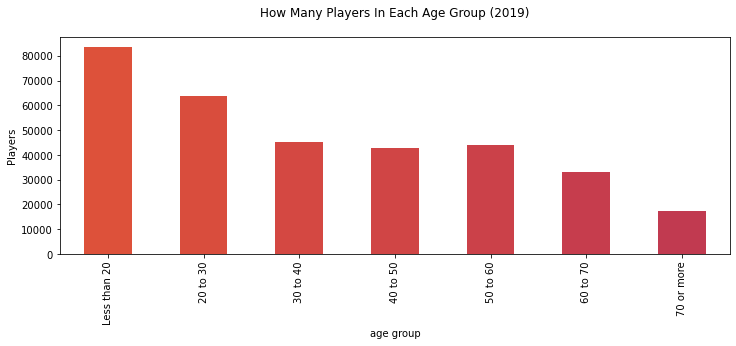

In [18]:
import numpy as np
from matplotlib import cm
color = cm.inferno_r(np.linspace(.4, .8, 30))
ag = total_age_count.plot(kind='bar', stacked=True, color=color, legend=False, figsize=(12, 4) )
ag.set_ylabel("Players")
ag.set_title('How Many Players In Each Age Group (2019)', pad=20)


Text(0.5, 1.0, 'Average rating for each age group (2019)')

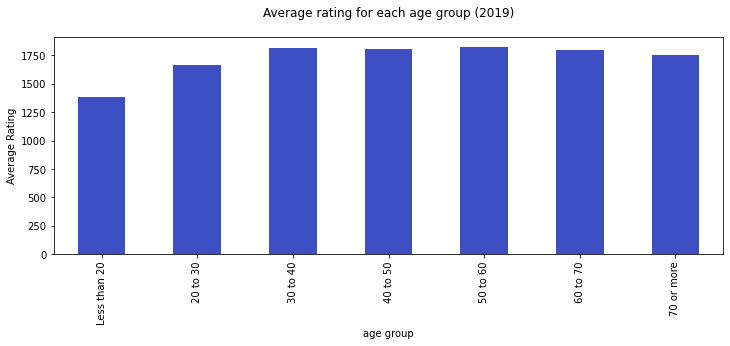

In [20]:
color = cm.coolwarm(np.linspace(start = 2, stop = 10, num = 5, dtype = int))
ag = rating_std_age.plot(kind='bar',color= color, legend=False, figsize=(12, 4) )
ag.set_ylabel("Average Rating")
ag.set_title('Average rating for each age group (2019)', pad=20)
